In [1]:
import agent as myagents
import gym
import matplotlib.pyplot as plt
from tqdm import tqdm
import utils
import numpy as np
from IPython.display import clear_output
import time

### Environment

In [2]:
env = gym.make("FrozenLake8x8-v0")

### Agent

In [23]:
agent_init = {
    'discount_factor': .999, 
    'learning_rate': 0.02, 
    'exploration_rate_decay': {
        'er': 1,
        'max_er': 1,
        'min_er': 0.01,
        'decay_er': 0.005
    },
    'num_action': env.action_space.n,
    'num_state': env.observation_space.n,
}
sarsa_agent = myagents.SarsaAgent(agent_init)

### Training

In [29]:
timesteps_per_episode = list()
rewards_per_episode = list()
n_episode = 20000
t_max_per_episode = 200
verbose = False
graphical = False

In [30]:
for i_episode in tqdm(range(n_episode)):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        if graphical:
            clear_output(wait=True)
            env.render()
            
        
        state, reward, done, info = env.step(next_action)
        next_action = sarsa_agent.update(state, reward, done)
        
        rewards += reward
        if done:
            break
            
    timesteps_per_episode.append(t)
    rewards_per_episode.append(rewards)
    sarsa_agent.epsilon.next()

sarsa_agent.epsilon.reset_episode_count()
env.close()

100%|██████████| 20000/20000 [00:34<00:00, 585.49it/s]


In [31]:
rewards_per_episode = np.array(rewards_per_episode)

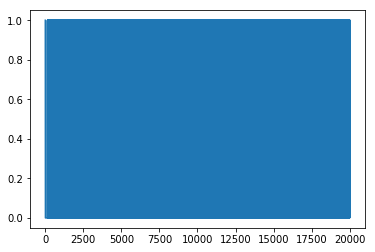

In [32]:
plt.plot(range(len(rewards_per_episode)), rewards_per_episode)

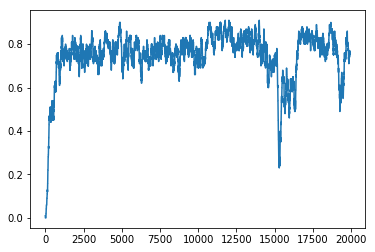

In [33]:
rewards_per_episode_rolling_mean = utils.moving_average(rewards_per_episode, n=100)
plt.plot(range(len(rewards_per_episode_rolling_mean)), rewards_per_episode_rolling_mean)

In [34]:
rewards_per_episode[19800:]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.])

### Testing

In [73]:
sarsa_agent.epsilon = 0.0

In [16]:
for i_episode in range(1):
    
    rewards = 0
    state = env.reset()
    next_action = sarsa_agent.episode_init(state)
    
    for t in range(t_max_per_episode):
        
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)  
        state, _, done, _ = env.step(next_action)
        next_action = sarsa_agent.e_greedy(state)
        
        if done:
            break
    
env.close()

  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG


In [5]:
0.01 + .99/ np.exp(-0.01*5678)

4.5172682076241185e+24

In [26]:
import inspect
lines = inspect.getsource(sarsa_agent.update)
print(lines)

    def update(self, state, reward, done):
        next_action = -1
        if not done:
            next_action = self.update_step(state, reward)
        if done:
            self.update_end(reward)

        return next_action



In [15]:
sarsa_agent.q


array([[0.55072807, 0.54155339, 0.51602974, 0.55628327, 0.56987554,
        0.58092843, 0.59382336, 0.7312947 , 0.51746301, 0.51884342,
        0.51076062, 0.40771663, 0.53845524, 0.57015309, 0.60714555,
        0.62867354, 0.55453655, 0.47592915, 0.55762519, 0.5       ,
        0.41636994, 0.39440752, 0.62102288, 0.69796239, 0.4657171 ,
        0.50360059, 0.39182405, 0.24817594, 0.43857193, 0.5       ,
        0.44037448, 0.70075102, 0.49632881, 0.37625974, 0.24396035,
        0.5       , 0.43419143, 0.47011308, 0.48426735, 0.71876754,
        0.48459195, 0.5       , 0.5       , 0.28334632, 0.38697731,
        0.42340919, 0.5       , 0.50435538, 0.47751209, 0.5       ,
        0.32595545, 0.37104048, 0.5       , 0.31025999, 0.5       ,
        0.56242228, 0.47453593, 0.42922257, 0.38893617, 0.5       ,
        0.4168322 , 0.49848316, 0.49430356, 0.5       ],
       [0.54884918, 0.61380018, 0.63954162, 0.53758861, 0.53930402,
        0.57152266, 0.59935908, 0.60514645, 0.50428863, 0.5